In [2]:
import ndlib
import ndlib.models.epidemics as ep

import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.CompositeModel as gc
import ndlib.models.compartments as cd

In [3]:
# directed graph of our network

g = nx.read_edgelist("D:/Dati PRAW/vecchi/SNA 14th commit/Project_Social_Network_Analysis-main/dati_ripuliti_edgelist.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes = g.number_of_nodes()
n_edges = g.number_of_edges()

print(n_nodes, ",", n_edges)

24819 , 107094


## Custom model that adds an additional countdown to the end of the infection (10 iteractions)

In [28]:
model10 = gc.CompositeModel(g)

# Model statuses
model10.add_status("Susceptible")
model10.add_status("Infected")

# Compartment definition
ct = cd.CountDown("sick_time", iterations=10)
c1 = cd.NodeStochastic(0.293)
c2 = cd.NodeStochastic(0.298, triggering_status="Infected")
# Rule definition
model10.add_rule("Infected", "Susceptible", c1)
model10.add_rule("Infected", "Susceptible", ct)
model10.add_rule("Susceptible", "Infected", c2)


# Model initial status configuration
cfg = mc.Configuration()
cfg.add_model_parameter('fraction_infected', 0.01)
#cfg.add_model_parameter('beta', 0.298) # infection rate
#cfg.add_model_parameter('lambda', 0.293) # recovery rate
#infected_nodes = ['wallstreetbets']
#cfg.add_model_initial_configuration("Infected", infected_nodes)

# Simulation execution
model10.set_initial_status(cfg)

iterations = model10.iteration_bunch(50, node_status=True)
trends10 = model10.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.13it/s]


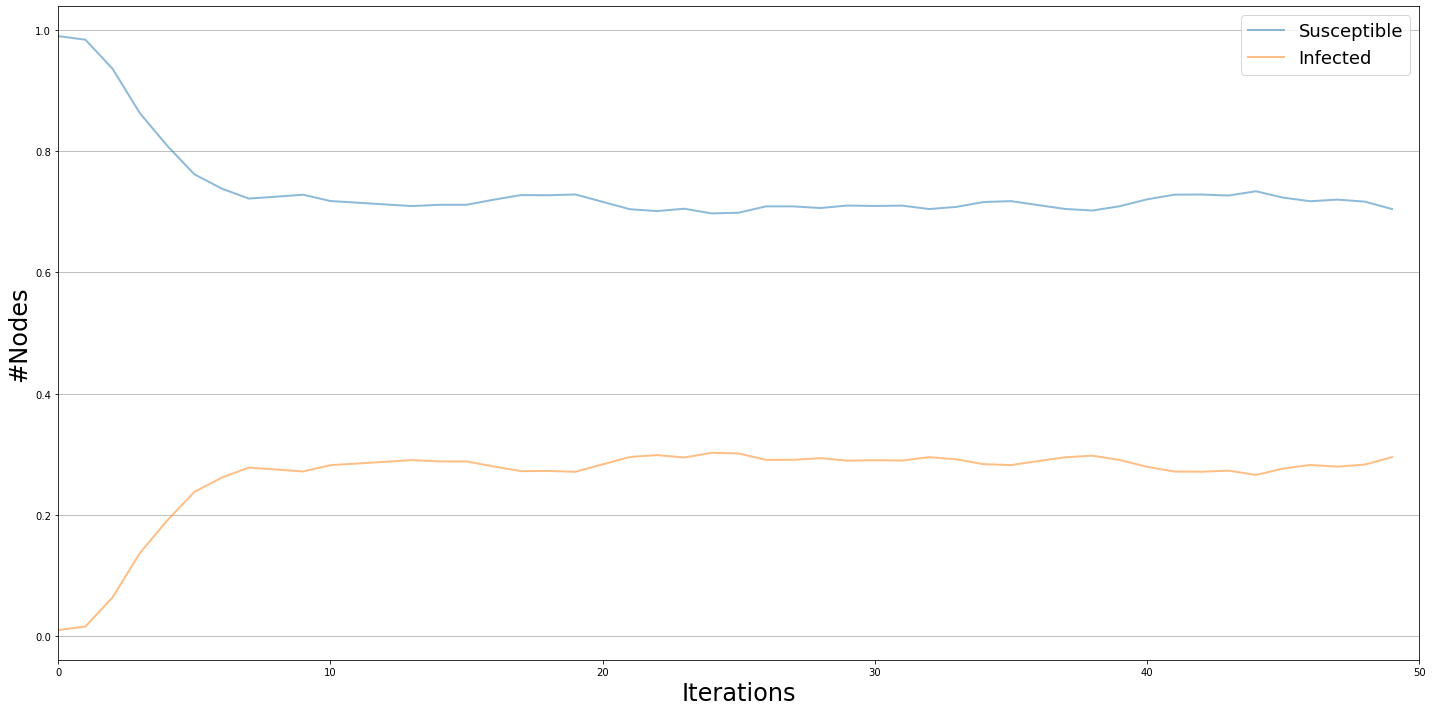

In [29]:
%matplotlib inline
viz = DiffusionTrend(model10, trends10)
viz.plot()

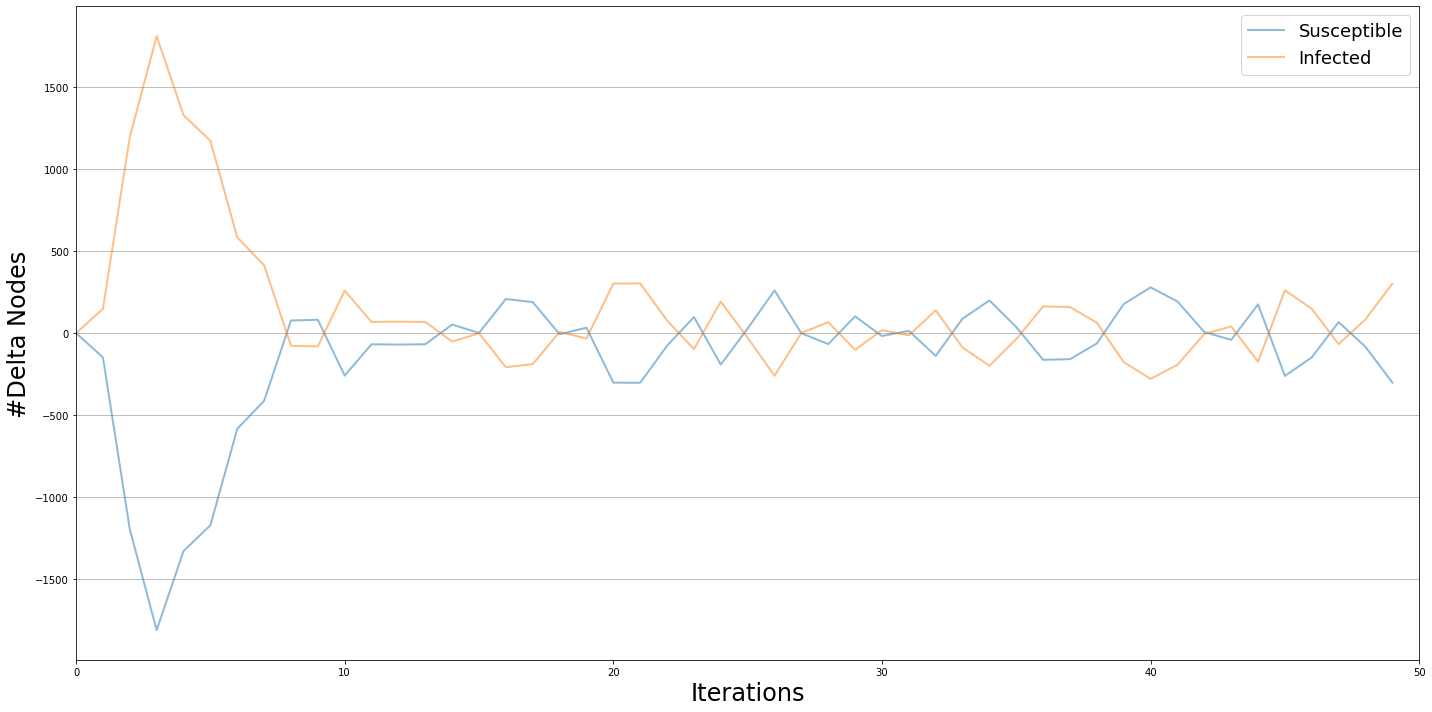

In [30]:
viz = DiffusionPrevalence(model10, trends10)
viz.plot()

## Custom model that adds an additional countdown to the end of the infection (5 iteractions)

In [31]:
model5 = gc.CompositeModel(g)

# Model statuses
model5.add_status("Susceptible")
model5.add_status("Infected")

# Compartment definition
ct = cd.CountDown("sick_time", iterations=5)
c1 = cd.NodeStochastic(0.293)
c2 = cd.NodeStochastic(0.298, triggering_status="Infected")

# Rule definition
model5.add_rule("Infected", "Susceptible", c1)
model5.add_rule("Infected", "Susceptible", ct)
model5.add_rule("Susceptible", "Infected", c2)

# Model initial status configuration
cfg = mc.Configuration()
cfg.add_model_parameter('fraction_infected', 0.01)

# Simulation execution
model5.set_initial_status(cfg)

iterations = model5.iteration_bunch(50, node_status=True)
trends5 = model5.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.86it/s]


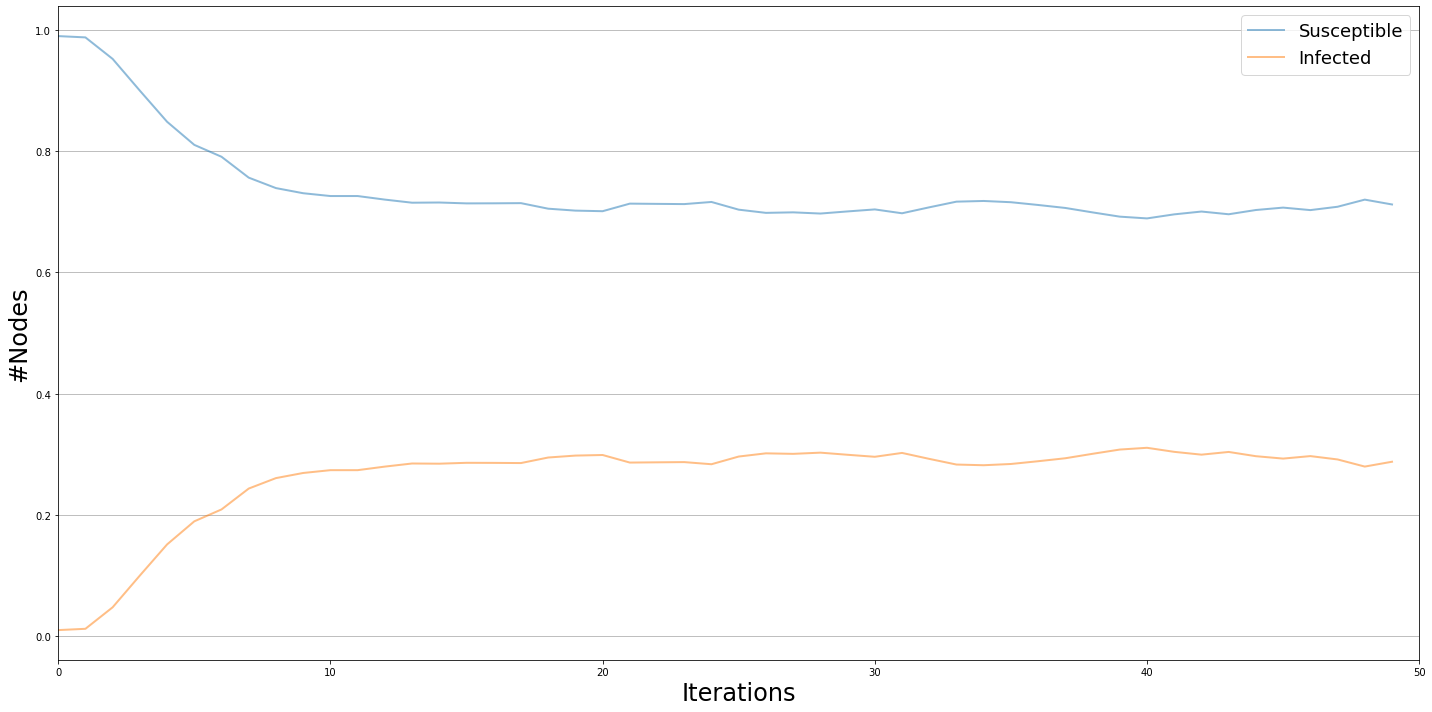

In [32]:
viz = DiffusionTrend(model5, trends5)
viz.plot()

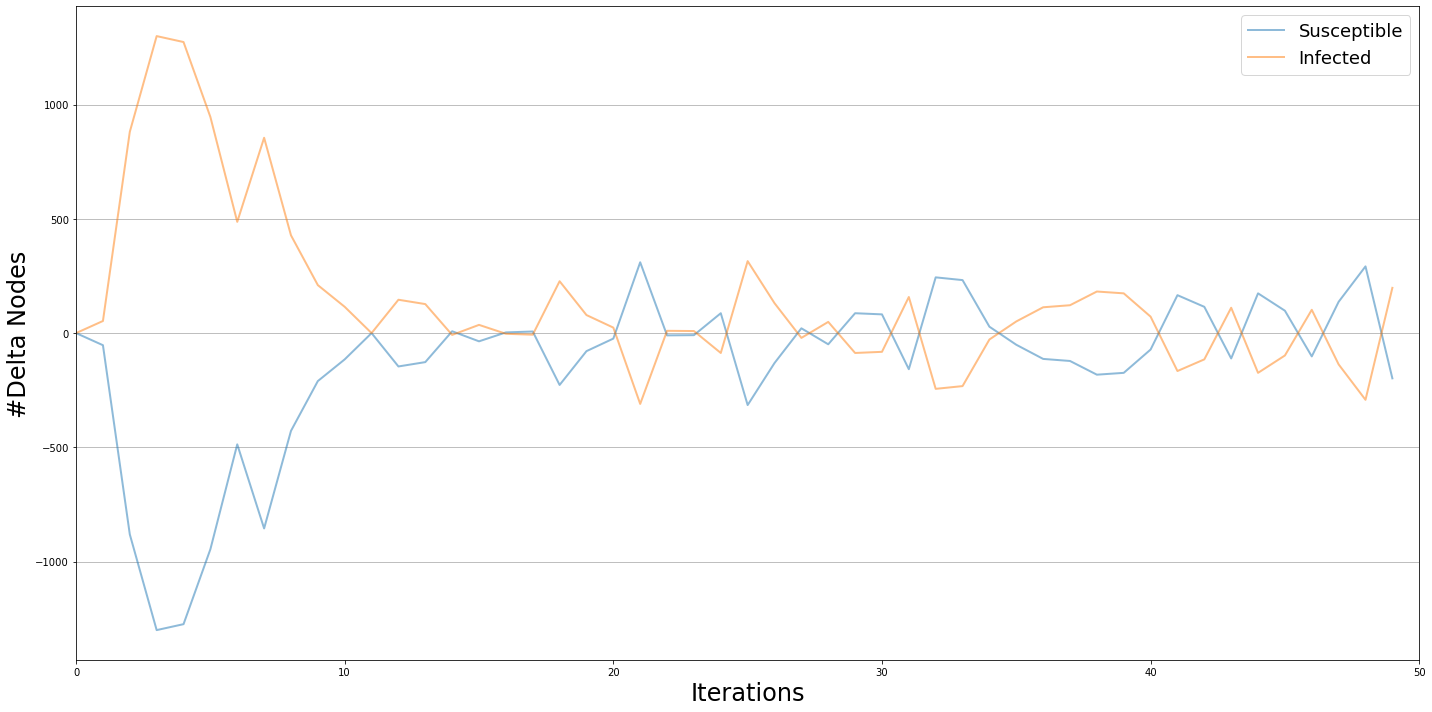

In [33]:
viz = DiffusionPrevalence(model5, trends5)
viz.plot()

## Custom model that adds an additional countdown to the end of the infection (2 iteractions)

In [34]:
model2 = gc.CompositeModel(g)

# Model statuses
model2.add_status("Susceptible")
model2.add_status("Infected")

# Compartment definition
ct = cd.CountDown("sick_time", iterations=2)
c1 = cd.NodeStochastic(0.293)
c2 = cd.NodeStochastic(0.298, triggering_status="Infected")

# Rule definition
model2.add_rule("Infected", "Susceptible", c1)
model2.add_rule("Infected", "Susceptible", ct)
model2.add_rule("Susceptible", "Infected", c2)

# Model initial status configuration
cfg = mc.Configuration()
cfg.add_model_parameter('fraction_infected', 0.01)

# Simulation execution
model2.set_initial_status(cfg)

iterations = model2.iteration_bunch(50, node_status=True)
trends2 = model2.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.29it/s]


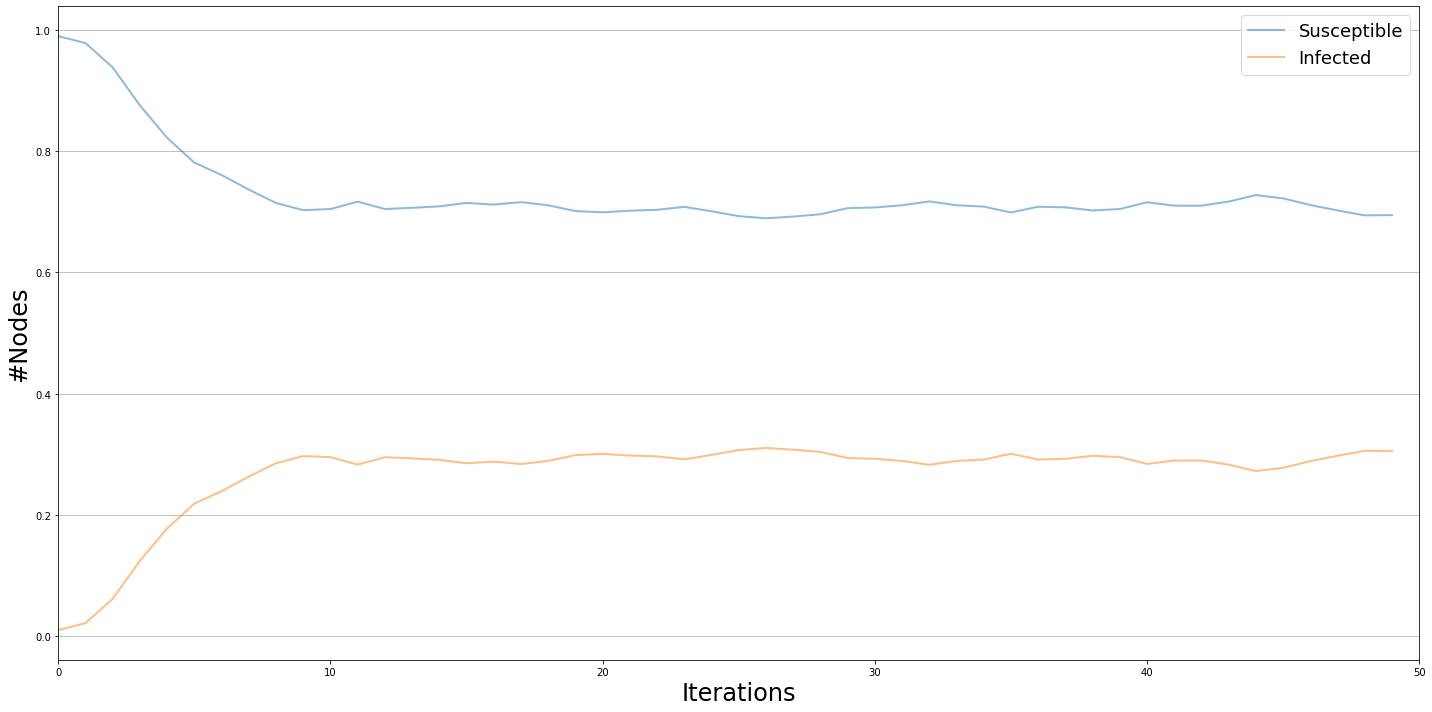

In [35]:
viz = DiffusionTrend(model2, trends2)
viz.plot()

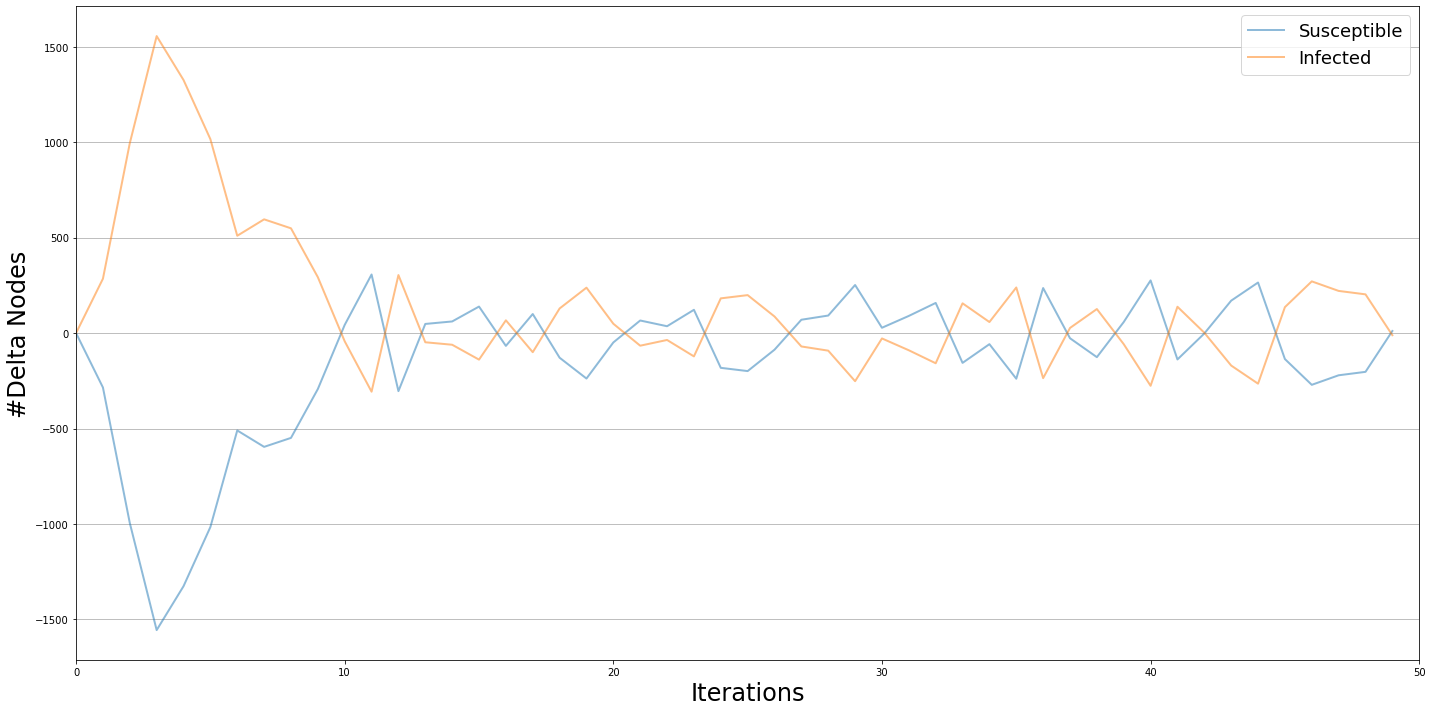

In [36]:
viz = DiffusionPrevalence(model2, trends2)
viz.plot()

Comparison:

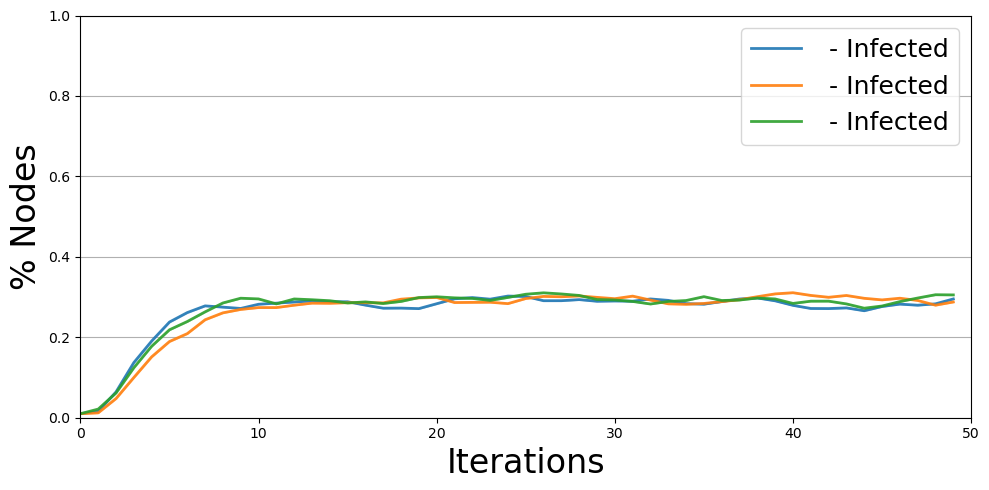

In [37]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model10, model5, model2], [trends10, trends5, trends2], statuses=['Infected'])
viz.plot()